# ANALYSING US MARITAL STATUS DATA FROM 2005 - 2017

DATA SOURCE: Data from the U.S. Census Bureau, American Community Survey 1-Year Estimates.

NB: The estimated population values were calculated based on 
    the estimated total population by gender and age group and the estimated percentage.

Source link: https://data.world/throwback-thurs/throwback-thursday-week-30-us-marriage-status-2005-2017

# SECTION 1

THIS SECTION EXPLORES THE MARITAL STATUS DATA. CHECKING ITS CONTENTS, DATA TYPES AND RESETTING DATATYPES WHERE 
NECESSARY.

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime,date
from pandas import DataFrame,Series
import seaborn as sns
from __future__ import division
%matplotlib inline

In [3]:
from matplotlib.ticker import StrMethodFormatter
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import datetime as dt

In [4]:
#READ DATA
marital_status = pd.read_csv('data/Week 30 - United States Marriage Status 2005 to 2017.csv')

In [5]:
#view contents of data
marital_status.head()

,Year,Gender,Age Group,Metric,Estimated Percent,Estimated Population
0,2008,Male,15 to 19 years,Total,1.0,11241214
1,2008,Male,20 to 34 years,Total,1.0,31342886
2,2008,Male,35 to 44 years,Total,1.0,21426309
3,2008,Male,45 to 54 years,Total,1.0,21889603
4,2008,Male,55 to 64 years,Total,1.0,16251184


In [6]:
#check the dtypes for each column
marital_status.dtypes

Year                      int64
Gender                   object
Age Group                object
Metric                   object
Estimated Percent       float64
Estimated Population      int64
dtype: object

In [7]:
#convert dtype for Year to datetime
marital_status.Year = pd.to_datetime(marital_status.Year,format='%Y')

In [8]:
#check for dtype for Year after conversion
marital_status.Year.dtype

dtype('<M8[ns]')

In [9]:
#set year as index
marital_status = marital_status.set_index('Year')

#print sample output
marital_status.head(3)

In [11]:
#remove years 
marital_status['Age Group'] = marital_status['Age Group'].str.replace('years',' ')

In [12]:
#remove white space
marital_status['Age Group'] = marital_status['Age Group'].str.rstrip()

In [13]:
#check if white space remove
marital_status['Age Group'][0]

'15 to 19'

In [14]:
#now replace 'to' with '-'
marital_status['Age Group'] = marital_status['Age Group'].str.replace('to','-')

In [15]:
#check result
marital_status['Age Group'][0]

'15 - 19'

In [16]:
#rename columns
marital_status = marital_status.rename(columns={'Age Group':'Age_Group','Estimated Population':'Estimated_Population','Estimated Percent':'Estimated_Percent'})

In [17]:
#round off estimated percent values to two decimal places
marital_status.Estimated_Percent = marital_status.Estimated_Percent.round(2)

In [18]:
marital_status.head(2)

,Gender,Age_Group,Metric,Estimated_Percent,Estimated_Population
Year,,,,,
2008-01-01,Male,15 - 19,Total,1.0,11241214
2008-01-01,Male,20 - 34,Total,1.0,31342886


In [19]:
#convert index period to year period
marital_status.index.to_period(freq='A')

PeriodIndex(['2008', '2008', '2008', '2008', '2008', '2008', '2008', '2008',
             '2008', '2008',
             ...
             '2014', '2014', '2014', '2014', '2014', '2014', '2014', '2014',
             '2014', '2014'],
            dtype='period[A-DEC]', name=u'Year', length=936, freq='A-DEC')

In [20]:
#resample ts data for married men between the ages of 15 to 19
#ts = divorce_df.resample('A',kind='period').sum()

# SECTION 2

THIS SECTION CREATES NEW DATAFRAMES FOR ONLY MEN AND WOMEN IN ORDER TO ANALYSE INDEPENDENTLY. I INITIALLY CREATED PLOTS
FOR EACH METRIC BUT REALISED IT WASNT EFFICIENT AND TIME CONSUMING. I THEN CREATED A FUNCTION TO AUTOMATICALLY CREATE
PLOT BASED THE METRIC

In [21]:
#select all male
male_1 = marital_status[marital_status.Gender=='Male']
#select married females
fem_1 = marital_status[marital_status.Gender=='Female']

In [22]:
#print sample result
male_1.head(2)

,Gender,Age_Group,Metric,Estimated_Percent,Estimated_Population
Year,,,,,
2008-01-01,Male,15 - 19,Total,1.0,11241214
2008-01-01,Male,20 - 34,Total,1.0,31342886


In [23]:
#select all married males
married_male = male_1[male_1.Metric=='Married']
#select all married females
married_female = fem_1[fem_1.Metric=='Married']
#select male Widowed
widowed_men = male_1[male_1.Metric=='Widowed']
#select female Widowed
widowed_women = fem_1[fem_1.Metric=='Widowed']
#select Divorced male
divorced_men = male_1[male_1.Metric=='Divorced']
#select Divorced female
divorced_women = fem_1[fem_1.Metric=='Divorced']
#select Separated male
sep_men = male_1[male_1.Metric=='Separated']
#select Separated female
sep_women = fem_1[fem_1.Metric=='Separated']
#select Never Married male
nvr_married_men = male_1[male_1.Metric=='Never Married']
#select Never Married female
nvr_married_women = fem_1[fem_1.Metric=='Never Married']

In [24]:
#print sample output
married_male.head(1)

,Gender,Age_Group,Metric,Estimated_Percent,Estimated_Population
Year,,,,,
2008-01-01,Male,15 - 19,Married,0.01,89930


In [25]:
#making sure number of male counts in original data is same as subset data below
((marital_status.Gender=='Male')&(marital_status.Metric=='Married')).value_counts()

False    858
True      78
dtype: int64

In [26]:
#number confirms its same
(married_male.Gender=='Male').value_counts()

True    78
Name: Gender, dtype: int64

In [27]:
#resample data
married_male_resample = married_male[['Estimated_Population']].resample('A').apply(lambda x: x.sum())
married_female_resample = married_female[['Estimated_Population']].resample('A').apply(lambda x: x.sum())
widowed_men_resample = widowed_men[['Estimated_Population']].resample('A').apply(lambda x: x.sum())
widowed_women_resample = widowed_women[['Estimated_Population']].resample('A').apply(lambda x: x.sum())
divorced_men_resample = divorced_men[['Estimated_Population']].resample('A').apply(lambda x: x.sum())
divorced_women_resample = divorced_women[['Estimated_Population']].resample('A').apply(lambda x: x.sum())
sep_men_resample = sep_men[['Estimated_Population']].resample('A').apply(lambda x: x.sum())
sep_women_resample = sep_women[['Estimated_Population']].resample('A').apply(lambda x: x.sum())
nvr_married_men_resample = nvr_married_men[['Estimated_Population']].resample('A').apply(lambda x: x.sum())
nvr_married_women_resample = nvr_married_women[['Estimated_Population']].resample('A').apply(lambda x: x.sum())

In [28]:
married_male_resample.head()

,Estimated_Population
Year,
2005-12-31,61668849
2006-12-31,60973735
2007-12-31,61431642
2008-12-31,61367346
2009-12-31,61232389


In [29]:
#display total est pop by gender,age group and metric
married_male2 = married_male.groupby([married_male.index,'Gender','Age_Group','Metric'])['Estimated_Population'].sum()

In [30]:
#print sample
married_male2.head(10)

Year        Gender  Age_Group      Metric 
2005-01-01  Male    15 - 19        Married      130754
                    20 - 34        Married    11041945
                    35 - 44        Married    14289962
                    45 - 54        Married    14406793
                    55 - 64        Married    10829584
                    65   and over  Married    10969811
2006-01-01  Male    15 - 19        Married      122605
                    20 - 34        Married    10439807
                    35 - 44        Married    13959484
                    45 - 54        Married    14263885
Name: Estimated_Population, dtype: int64

In [734]:
'''idx = married_male.index.to_series().apply(lambda x: dt.datetime.strftime(x, '%Y'))
married_male.pivot_table('Estimated_Population', index=idx,
                    columns=['Age_Group'],
                         aggfunc='sum').plot(figsize=(15,8),kind='bar',stacked=True, rot=45)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000000)))
plt.title('Estimated Population of Married Men',fontsize=24)
plt.xlabel('Year', fontsize=22)
plt.ylabel("Estimated Population(million)",fontsize=23)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
lgd = plt.legend(loc='best', bbox_to_anchor=(1.02, 1.02),fontsize=15)
lgd.set_title('Age Group', prop = {'size':15})
#plt.grid(axis='y',c='b')
plt.show()'''

'idx = married_male.index.to_series().apply(lambda x: dt.datetime.strftime(x, \'%Y\'))\nmarried_male.pivot_table(\'Estimated_Population\', index=idx,\n                    columns=[\'Age_Group\'],\n                         aggfunc=\'sum\').plot(figsize=(15,8),kind=\'bar\',stacked=True, rot=45)\nplt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: \'{:,.0f}\'.format(x/1000000)))\nplt.title(\'Estimated Population of Married Men\',fontsize=24)\nplt.xlabel(\'Year\', fontsize=22)\nplt.ylabel("Estimated Population(million)",fontsize=23)\nplt.xticks(fontsize=15)\nplt.yticks(fontsize=15)\nlgd = plt.legend(loc=\'best\', bbox_to_anchor=(1.02, 1.02),fontsize=15)\nlgd.set_title(\'Age Group\', prop = {\'size\':15})\n#plt.grid(axis=\'y\',c=\'b\')\nplt.show()'

In [735]:
'''idx = married_male.index.to_series().apply(lambda x: dt.datetime.strftime(x, '%Y'))
divorced_men.pivot_table('Estimated_Population', index=idx,
                    columns=['Age_Group'],
                         aggfunc='sum').plot(figsize=(15,8),kind='bar',stacked=True, rot=45)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000000)))
plt.title('Estimated Population of Divorced Men',fontsize=24)
plt.xlabel('Year', fontsize=22)
plt.ylabel("Estimated Population(million)",fontsize=23)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
lgd = plt.legend(loc='best', bbox_to_anchor=(1.02, 1.02),fontsize=15)
lgd.set_title('Age Group', prop = {'size':15})
#plt.grid(axis='y',c='b')
plt.show()'''

'idx = married_male.index.to_series().apply(lambda x: dt.datetime.strftime(x, \'%Y\'))\ndivorced_men.pivot_table(\'Estimated_Population\', index=idx,\n                    columns=[\'Age_Group\'],\n                         aggfunc=\'sum\').plot(figsize=(15,8),kind=\'bar\',stacked=True, rot=45)\nplt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: \'{:,.0f}\'.format(x/1000000)))\nplt.title(\'Estimated Population of Divorced Men\',fontsize=24)\nplt.xlabel(\'Year\', fontsize=22)\nplt.ylabel("Estimated Population(million)",fontsize=23)\nplt.xticks(fontsize=15)\nplt.yticks(fontsize=15)\nlgd = plt.legend(loc=\'best\', bbox_to_anchor=(1.02, 1.02),fontsize=15)\nlgd.set_title(\'Age Group\', prop = {\'size\':15})\n#plt.grid(axis=\'y\',c=\'b\')\nplt.show()'

In [736]:
'''idx = married_male.index.to_series().apply(lambda x: dt.datetime.strftime(x, '%Y'))
sep_men.pivot_table('Estimated_Population', index=idx,
                    columns=['Age_Group'],
                         aggfunc='sum').plot(figsize=(15,8),kind='bar',stacked=True, rot=45)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000000)))
plt.title('Estimated Population of Separated Men',fontsize=24)
plt.xlabel('Year', fontsize=22)
plt.ylabel("Estimated Population(million)",fontsize=23)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.locator_params(axis='y', nbins=4)
lgd = plt.legend(loc='best', bbox_to_anchor=(1.02, 1.02),fontsize=15)
lgd.set_title('Age Group', prop = {'size':15})
#plt.grid(axis='y',c='b')
plt.show()'''

'idx = married_male.index.to_series().apply(lambda x: dt.datetime.strftime(x, \'%Y\'))\nsep_men.pivot_table(\'Estimated_Population\', index=idx,\n                    columns=[\'Age_Group\'],\n                         aggfunc=\'sum\').plot(figsize=(15,8),kind=\'bar\',stacked=True, rot=45)\nplt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: \'{:,.0f}\'.format(x/1000000)))\nplt.title(\'Estimated Population of Separated Men\',fontsize=24)\nplt.xlabel(\'Year\', fontsize=22)\nplt.ylabel("Estimated Population(million)",fontsize=23)\nplt.xticks(fontsize=15)\nplt.yticks(fontsize=15)\nplt.locator_params(axis=\'y\', nbins=4)\nlgd = plt.legend(loc=\'best\', bbox_to_anchor=(1.02, 1.02),fontsize=15)\nlgd.set_title(\'Age Group\', prop = {\'size\':15})\n#plt.grid(axis=\'y\',c=\'b\')\nplt.show()'

In [737]:
'''idx = married_male.index.to_series().apply(lambda x: dt.datetime.strftime(x, '%Y'))
nvr_married_men.pivot_table('Estimated_Population', index=idx,
                    columns=['Age_Group'],
                         aggfunc='sum').plot(figsize=(15,8),kind='bar',stacked=True, rot=45)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000000)))
plt.title('Estimated Population of Never Married Men',fontsize=24)
plt.xlabel('Year', fontsize=22)
plt.ylabel("Estimated Population(million)",fontsize=23)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
lgd = plt.legend(loc='best', bbox_to_anchor=(1.02, 1.02),fontsize=15)
lgd.set_title('Age Group', prop = {'size':15})
#plt.grid(axis='y',c='b')
plt.show()'''

'idx = married_male.index.to_series().apply(lambda x: dt.datetime.strftime(x, \'%Y\'))\nnvr_married_men.pivot_table(\'Estimated_Population\', index=idx,\n                    columns=[\'Age_Group\'],\n                         aggfunc=\'sum\').plot(figsize=(15,8),kind=\'bar\',stacked=True, rot=45)\nplt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: \'{:,.0f}\'.format(x/1000000)))\nplt.title(\'Estimated Population of Never Married Men\',fontsize=24)\nplt.xlabel(\'Year\', fontsize=22)\nplt.ylabel("Estimated Population(million)",fontsize=23)\nplt.xticks(fontsize=15)\nplt.yticks(fontsize=15)\nlgd = plt.legend(loc=\'best\', bbox_to_anchor=(1.02, 1.02),fontsize=15)\nlgd.set_title(\'Age Group\', prop = {\'size\':15})\n#plt.grid(axis=\'y\',c=\'b\')\nplt.show()'

In [738]:
'''idx = married_male.index.to_series().apply(lambda x: dt.datetime.strftime(x, '%Y'))
widowed_men.pivot_table('Estimated_Population', index=idx,
                    columns=['Age_Group'],
                         aggfunc='sum').plot(figsize=(15,8),kind='bar',stacked=True, rot=45)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000000)))
plt.title('Estimated Population of Widowed Men',fontsize=24)
plt.xlabel('Year', fontsize=22)
plt.ylabel("Estimated Population(million)",fontsize=23)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.locator_params(axis='y', nbins=6)
lgd = plt.legend(loc='best', bbox_to_anchor=(1.02, 1.02),fontsize=15)
lgd.set_title('Age Group', prop = {'size':15})
plt.grid(axis='y',c='b')
plt.show()'''

'idx = married_male.index.to_series().apply(lambda x: dt.datetime.strftime(x, \'%Y\'))\nwidowed_men.pivot_table(\'Estimated_Population\', index=idx,\n                    columns=[\'Age_Group\'],\n                         aggfunc=\'sum\').plot(figsize=(15,8),kind=\'bar\',stacked=True, rot=45)\nplt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: \'{:,.0f}\'.format(x/1000000)))\nplt.title(\'Estimated Population of Widowed Men\',fontsize=24)\nplt.xlabel(\'Year\', fontsize=22)\nplt.ylabel("Estimated Population(million)",fontsize=23)\nplt.xticks(fontsize=15)\nplt.yticks(fontsize=15)\nplt.locator_params(axis=\'y\', nbins=6)\nlgd = plt.legend(loc=\'best\', bbox_to_anchor=(1.02, 1.02),fontsize=15)\nlgd.set_title(\'Age Group\', prop = {\'size\':15})\nplt.grid(axis=\'y\',c=\'b\')\nplt.show()'

In [740]:
'''idx = married_male.index.to_series().apply(lambda x: dt.datetime.strftime(x, '%Y'))
married_female.pivot_table('Estimated_Population', index=idx,
                    columns=['Age_Group'],
                         aggfunc='sum').plot(figsize=(15,8),kind='bar',stacked=True, rot=45)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000000)))
plt.title('Estimated Population of Married Women',fontsize=24)
plt.xlabel('Year', fontsize=22)
plt.ylabel("Estimated Population(million)",fontsize=23)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
lgd = plt.legend(loc='best', bbox_to_anchor=(1.02, 1.02),fontsize=15)
lgd.set_title('Age Group', prop = {'size':15})
#plt.grid(axis='y',c='b')
plt.show()'''

'idx = married_male.index.to_series().apply(lambda x: dt.datetime.strftime(x, \'%Y\'))\nmarried_female.pivot_table(\'Estimated_Population\', index=idx,\n                    columns=[\'Age_Group\'],\n                         aggfunc=\'sum\').plot(figsize=(15,8),kind=\'bar\',stacked=True, rot=45)\nplt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: \'{:,.0f}\'.format(x/1000000)))\nplt.title(\'Estimated Population of Married Women\',fontsize=24)\nplt.xlabel(\'Year\', fontsize=22)\nplt.ylabel("Estimated Population(million)",fontsize=23)\nplt.xticks(fontsize=15)\nplt.yticks(fontsize=15)\nlgd = plt.legend(loc=\'best\', bbox_to_anchor=(1.02, 1.02),fontsize=15)\nlgd.set_title(\'Age Group\', prop = {\'size\':15})\n#plt.grid(axis=\'y\',c=\'b\')\nplt.show()'

In [741]:
'''idx = married_male.index.to_series().apply(lambda x: dt.datetime.strftime(x, '%Y'))
divorced_women.pivot_table('Estimated_Population', index=idx,
                    columns=['Age_Group'],
                         aggfunc='sum').plot(figsize=(15,8),kind='bar',stacked=True, rot=45)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000000)))
plt.title('Estimated Population of Divorced Women',fontsize=24)
plt.xlabel('Year', fontsize=22)
plt.ylabel("Estimated Population(million)",fontsize=23)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
lgd = plt.legend(loc='best', bbox_to_anchor=(1.02, 1.02),fontsize=15)
lgd.set_title('Age Group', prop = {'size':15})
#plt.grid(axis='y',c='b')
plt.show()'''

'idx = married_male.index.to_series().apply(lambda x: dt.datetime.strftime(x, \'%Y\'))\ndivorced_women.pivot_table(\'Estimated_Population\', index=idx,\n                    columns=[\'Age_Group\'],\n                         aggfunc=\'sum\').plot(figsize=(15,8),kind=\'bar\',stacked=True, rot=45)\nplt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: \'{:,.0f}\'.format(x/1000000)))\nplt.title(\'Estimated Population of Divorced Women\',fontsize=24)\nplt.xlabel(\'Year\', fontsize=22)\nplt.ylabel("Estimated Population(million)",fontsize=23)\nplt.xticks(fontsize=15)\nplt.yticks(fontsize=15)\nlgd = plt.legend(loc=\'best\', bbox_to_anchor=(1.02, 1.02),fontsize=15)\nlgd.set_title(\'Age Group\', prop = {\'size\':15})\n#plt.grid(axis=\'y\',c=\'b\')\nplt.show()'

In [742]:
'''idx = married_male.index.to_series().apply(lambda x: dt.datetime.strftime(x, '%Y'))
sep_women.pivot_table('Estimated_Population', index=idx,
                    columns=['Age_Group'],
                         aggfunc='sum').plot(figsize=(15,8),kind='bar',stacked=True, rot=45)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/100000)))
plt.title('Estimated Population of Separated Women',fontsize=24)
plt.xlabel('Year', fontsize=22)
plt.ylabel("Estimated Population('00,000')",fontsize=23)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
lgd = plt.legend(loc='best', bbox_to_anchor=(1.02, 1.02),fontsize=15)
lgd.set_title('Age Group', prop = {'size':15})
#plt.grid(axis='y',c='b')
plt.show()'''

'idx = married_male.index.to_series().apply(lambda x: dt.datetime.strftime(x, \'%Y\'))\nsep_women.pivot_table(\'Estimated_Population\', index=idx,\n                    columns=[\'Age_Group\'],\n                         aggfunc=\'sum\').plot(figsize=(15,8),kind=\'bar\',stacked=True, rot=45)\nplt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: \'{:,.0f}\'.format(x/100000)))\nplt.title(\'Estimated Population of Separated Women\',fontsize=24)\nplt.xlabel(\'Year\', fontsize=22)\nplt.ylabel("Estimated Population(\'00,000\')",fontsize=23)\nplt.xticks(fontsize=15)\nplt.yticks(fontsize=15)\nlgd = plt.legend(loc=\'best\', bbox_to_anchor=(1.02, 1.02),fontsize=15)\nlgd.set_title(\'Age Group\', prop = {\'size\':15})\n#plt.grid(axis=\'y\',c=\'b\')\nplt.show()'

In [743]:
'''idx = married_male.index.to_series().apply(lambda x: dt.datetime.strftime(x, '%Y'))
nvr_married_women.pivot_table('Estimated_Population', index=idx,
                    columns=['Age_Group'],
                         aggfunc='sum').plot(figsize=(15,8),kind='bar',stacked=True, rot=45)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000000)))
plt.title('Estimated Population of Never Married Women',fontsize=24)
plt.xlabel('Year', fontsize=22)
plt.ylabel("Estimated Population(million)",fontsize=23)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
lgd = plt.legend(loc='best', bbox_to_anchor=(1.02, 1.02),fontsize=15)
lgd.set_title('Age Group', prop = {'size':15})
#plt.grid(axis='y',c='b')
plt.show()'''

'idx = married_male.index.to_series().apply(lambda x: dt.datetime.strftime(x, \'%Y\'))\nnvr_married_women.pivot_table(\'Estimated_Population\', index=idx,\n                    columns=[\'Age_Group\'],\n                         aggfunc=\'sum\').plot(figsize=(15,8),kind=\'bar\',stacked=True, rot=45)\nplt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: \'{:,.0f}\'.format(x/1000000)))\nplt.title(\'Estimated Population of Never Married Women\',fontsize=24)\nplt.xlabel(\'Year\', fontsize=22)\nplt.ylabel("Estimated Population(million)",fontsize=23)\nplt.xticks(fontsize=15)\nplt.yticks(fontsize=15)\nlgd = plt.legend(loc=\'best\', bbox_to_anchor=(1.02, 1.02),fontsize=15)\nlgd.set_title(\'Age Group\', prop = {\'size\':15})\n#plt.grid(axis=\'y\',c=\'b\')\nplt.show()'

In [48]:
#making copies of df
married_male_df = married_male.copy()
married_female_df = married_female.copy()
widowed_men_df = widowed_men.copy()
widowed_women_df = widowed_women.copy()
divorced_men_df = divorced_men.copy()
divorced_women_df = divorced_women.copy()
sep_men_df = sep_men.copy()
sep_women_df = sep_women.copy()
nvr_married_men_df = nvr_married_men.copy()
nvr_married_women_df = nvr_married_women.copy()

In [49]:
married_male3 = married_male_df.groupby([married_male_df.index,'Age_Group'])[['Estimated_Population']].sum()
married_female3= married_female_df.groupby([married_female_df.index,'Age_Group'])[['Estimated_Population']].sum()
widowed_men3= widowed_men_df.groupby([widowed_men_df.index,'Age_Group'])[['Estimated_Population']].sum()
widowed_women3= widowed_women_df.groupby([widowed_women_df.index,'Age_Group'])[['Estimated_Population']].sum()
divorced_men3= divorced_men_df.groupby([divorced_men_df.index,'Age_Group'])[['Estimated_Population']].sum()
divorced_women3= divorced_women_df.groupby([divorced_women_df.index,'Age_Group'])[['Estimated_Population']].sum()
sep_men3= sep_men_df.groupby([sep_men_df.index,'Age_Group'])[['Estimated_Population']].sum()
sep_women3= sep_women_df.groupby([sep_women_df.index,'Age_Group'])[['Estimated_Population']].sum()
nvr_married_men3= nvr_married_men_df.groupby([nvr_married_men_df.index,'Age_Group'])[['Estimated_Population']].sum()
nvr_married_women3= nvr_married_women_df.groupby([nvr_married_women_df.index,'Age_Group'])[['Estimated_Population']].sum()

In [550]:
#create new dataframe with groups and unstacking
married_male3 = married_male3.reset_index().groupby(['Year', 'Age_Group'])['Estimated_Population'].sum().unstack('Age_Group')

In [552]:
#format index to show only year
married_male3_index = married_male3.index.to_series().apply(lambda x: dt.datetime.strftime(x, '%Y'))

In [553]:
#set the formatted index to dataframe
married_male3 = married_male3.set_index(married_male3_index)

In [554]:
#creating extra column to contain the total of all age groups for each year
married_male3['Total'] = married_male3['15 - 19'] + married_male3['20 - 34'] + married_male3['35 - 44'] + married_male3['45 - 54']+ married_male3['55 - 64']+ married_male3['65   and over']

In [555]:
#define new variable to store total
df_total = married_male3['Total']

In [556]:
#create percentage of total for each age group
df_percnt = married_male3[married_male3.columns[0:6]].div(df_total, 0)*100

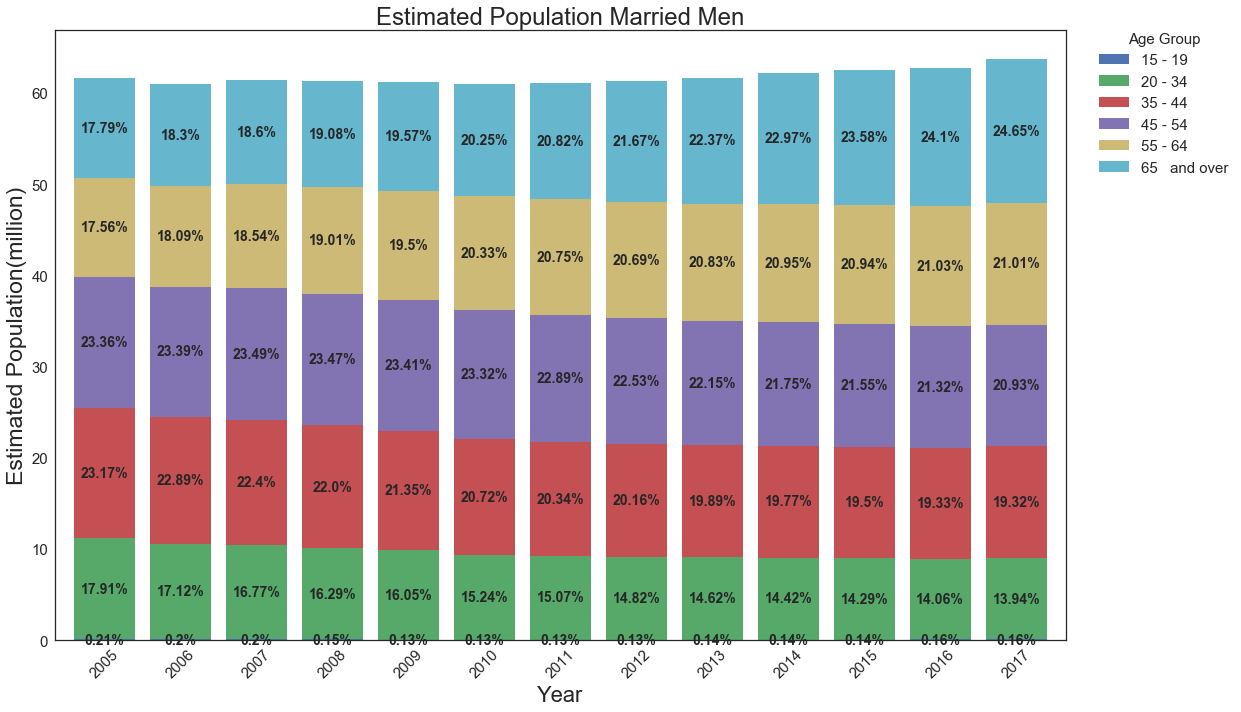

In [750]:
sns.set_style("white") #change plot color to white background
married_male3.iloc[:, 0:6].plot(kind='bar', stacked=True, figsize=(15,10),rot=45, alpha=0.99,width=0.8)
for n in df_percnt:
    for i, (cs, ab, pc, tot) in enumerate(zip(married_male3.iloc[:, 0:6].cumsum(1)[n], married_male3[n], df_percnt[n], df_total)):
        #plt.text(i,tot, str(tot), va='center') this displays the total
        plt.text(i, cs - ab/2,str(np.round(pc, 2)) + '%', va='center', ha='center',weight='bold',fontsize=14)

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000000)))
plt.title('Estimated Population Married Men',fontsize=24)
plt.xlabel('Year', fontsize=22)
plt.ylabel("Estimated Population(million)",fontsize=23)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
lgd = plt.legend(loc='best', bbox_to_anchor=(1.02, 1.02),fontsize=15)
lgd.set_title('Age Group', prop = {'size':15})
#plt.grid()
plt.tight_layout()
plt.show()

In [745]:
#computing percentages for each age group in each year 
#married_male3['Percentage'] = 100 * married_male3[['Estimated_Population']]  /married_male3.groupby(level='Year').sum()
#married_female3['Percentage'] = 100 * married_female3[['Estimated_Population']]  /married_female3.groupby(level='Year').sum()
#widowed_men3['Percentage'] = 100 * widowed_men3[['Estimated_Population']]  /widowed_men3.groupby(level='Year').sum()
#widowed_women3['Percentage'] = 100 * widowed_women3[['Estimated_Population']]  /widowed_women3.groupby(level='Year').sum()
#divorced_men3['Percentage'] = 100 * divorced_men3[['Estimated_Population']]  /divorced_men3.groupby(level='Year').sum()
#divorced_women3['Percentage'] = 100 * divorced_women3[['Estimated_Population']]  /divorced_women3.groupby(level='Year').sum()
#sep_men3['Percentage'] = 100 * sep_men3[['Estimated_Population']]  /sep_men3.groupby(level='Year').sum()
#sep_women3['Percentage'] = 100 * sep_women3[['Estimated_Population']]  /sep_women3.groupby(level='Year').sum()
#nvr_married_men3['Percentage'] = 100 * nvr_married_men3[['Estimated_Population']]  /nvr_married_men3.groupby(level='Year').sum()
#nvr_married_women3['Percentage'] = 100 * nvr_married_women3[['Estimated_Population']]  /nvr_married_women3.groupby(level='Year').sum()

In [54]:
#married_male3['Percentage'] = married_male3['Percentage'].round(2)
#married_female3['Percentage'] = married_female3['Percentage'].round(2)
#widowed_men3['Percentage'] = widowed_men3['Percentage'].round(2)
#widowed_women3['Percentage'] =widowed_women3['Percentage'].round(2) 
#divorced_men3['Percentage'] = divorced_men3['Percentage'].round(2)
#divorced_women3['Percentage'] = divorced_women3['Percentage'].round(2)
#sep_men3['Percentage'] = sep_men3['Percentage'].round(2)
#sep_women3['Percentage'] = sep_women3['Percentage'].round(2)
#nvr_married_men3['Percentage'] = nvr_married_men3['Percentage'].round(2) 
#nvr_married_women3['Percentage'] = nvr_married_women3['Percentage'].round(2)

In [483]:
married_male3.head(10)

Estimated_Population  Percentage
Year       Age_Group                                      
2005-01-01 15 - 19                      130754        0.21
           20 - 34                    11041945       17.91
           35 - 44                    14289962       23.17
           45 - 54                    14406793       23.36
           55 - 64                    10829584       17.56
           65   and over              10969811       17.79
2006-01-01 15 - 19                      122605        0.20
           20 - 34                    10439807       17.12
           35 - 44                    13959484       22.89
           45 - 54                    14263885       23.39

# SECTION 3

THIS SECTION CREATES A FUNCTION TO PLOT METRICS AUTOMATICALLY WITHOUT HARDCODING EACH TIME FOR EACH METRIC.

In [758]:
#creating a function to create unstacked dataframe and plotting for each marital status category
def plot_status(data,x):
    df=data.reset_index().groupby(['Year','Age_Group'])['Estimated_Population'].sum().unstack('Age_Group')
    df_index=df.index.to_series().apply(lambda x: dt.datetime.strftime(x, '%Y'))
    df = df.set_index(df_index)
    df['Total'] = df['15 - 19'] + df['20 - 34'] + df['35 - 44'] + df['45 - 54']+ df['55 - 64']+ df['65   and over']
    df_total = df['Total']
    df_pcnt = df[df.columns[0:6]].div(df_total, 0)*100
    title={'married_men':'Estimated Population of Married Men','marriedWomen':'Estimated Population of Married Women',
   'widowed_men':'Estimated Population of Widowed Men','widowed_women':'Estimated Population of Widowed Women',
   'divorced_men':'Estimated Population of Divorced Men','divorced_women':'Estimated Population of Divorced Women',
   'separated_men':'Estimated Population of Separated Men','separated_women':'Estimated Population of Separated Women',
   'nvr_married_men':'Estimated Population of Never Married Men','nvr_married_women':'Estimated Population of Never Married Women'}
    title_df = pd.DataFrame(title,index=np.arange(1))
    

    sns.set_style("white") #change plot color to white background
    df.iloc[:, 0:6].plot(kind='bar', stacked=True, figsize=(15,10),rot=45, alpha=0.99,width=0.8)
    for n in df_pcnt:
        for i, (cs, ab, pc, tot) in enumerate(zip(df.iloc[:, 0:6].cumsum(1)[n], df[n], df_pcnt[n], df_total)):
            #plt.text(i,tot, str(tot), va='center') this displays the total
            plt.text(i, cs - ab/2,str(np.round(pc, 2)) + '%', va='center', ha='center',weight='bold',fontsize=14)

    plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000000)))
    for key,value in title_df.iteritems():
        if x in key:
            plt.title(''.join(value),fontsize=24,weight='bold')
            plt.locator_params(axis='y', nbins=4)
            plt.grid(axis='y',c='b')
    plt.xlabel('Year', fontsize=22)
    plt.ylabel("Estimated Population(million)",fontsize=23)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    lgd = plt.legend(loc='best', bbox_to_anchor=(1.02, 1.02),fontsize=15)
    lgd.set_title('Age Group', prop = {'size':15})
    #plt.grid()
    plt.tight_layout()
    plt.show()

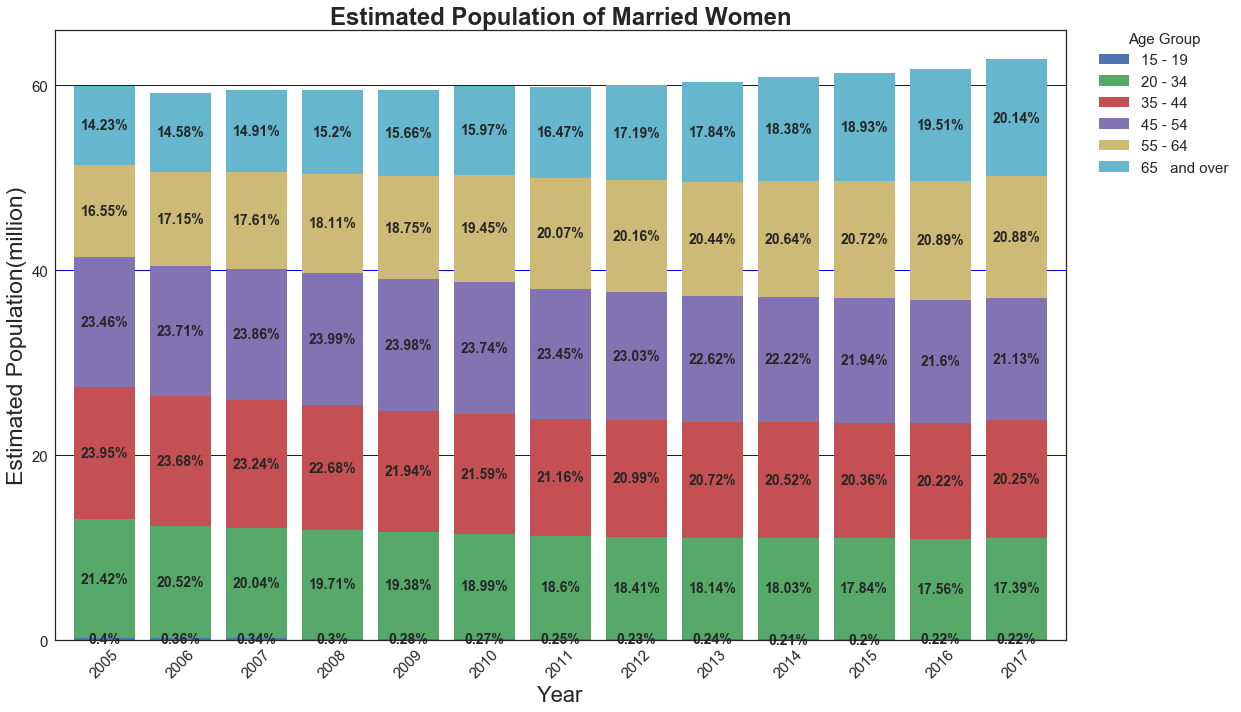

In [759]:
#plotting married men
plot_status(data=married_female3,x='marriedWomen')

THIS PLOT REVEALS THAT MOST MARRIED WOMEN WERE BETWEEN 35 AND 44. THROUGHOUT THE TWELVE YEAR PERIOD, THEY ACCOUNTED FOR 
23.95% FOR THE YEAR 2005, WHICH WAS THE HIGHEST IN THE TWELVE YEARS PERIOD. THE LEAST NUMBER OF MARRIED WOMEN WERE 
BETWEEN 15 AND 19, AND THE YEAR THAT SAW THE LOWEST WAS 2015, ACCOUNTING FOR ONLY 0.2% OF THE POPULATION IN THE AGE
GROUP.

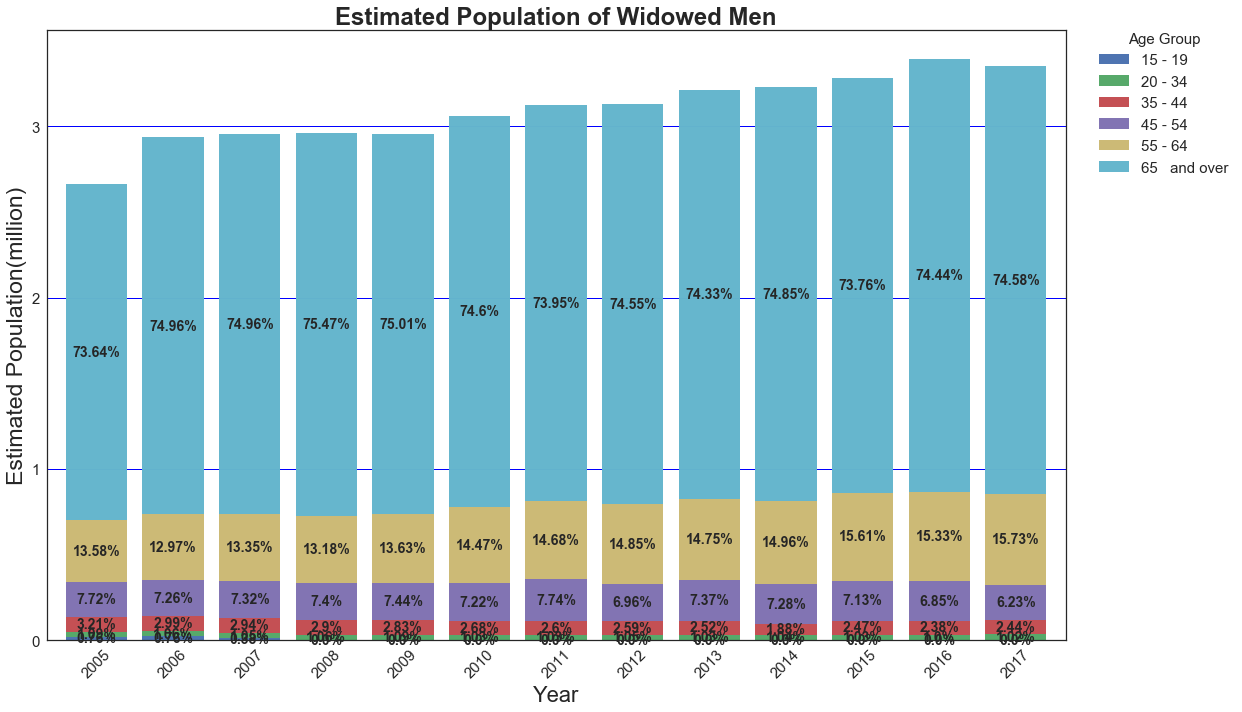

In [760]:
#plotting widowed men
plot_status(data=widowed_men3,x='widowed_men')

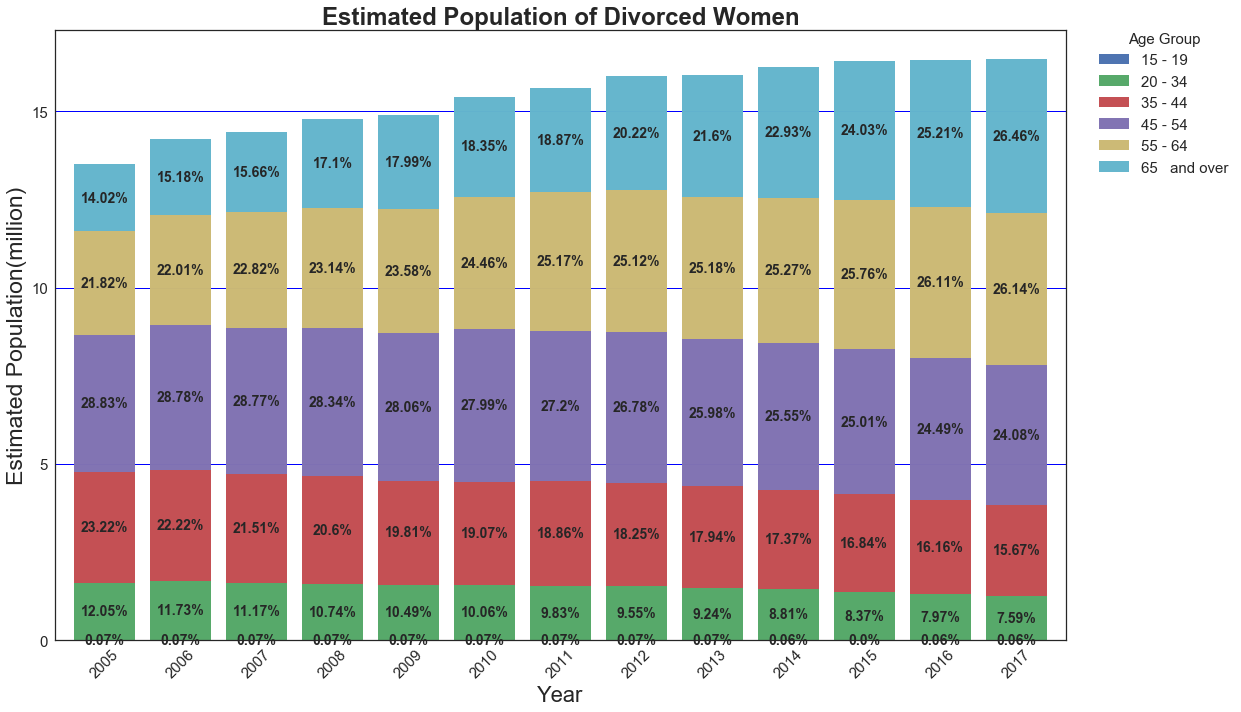

In [731]:
#plotting divorced women
plot_status(data=divorced_women3,x='divorced_women')

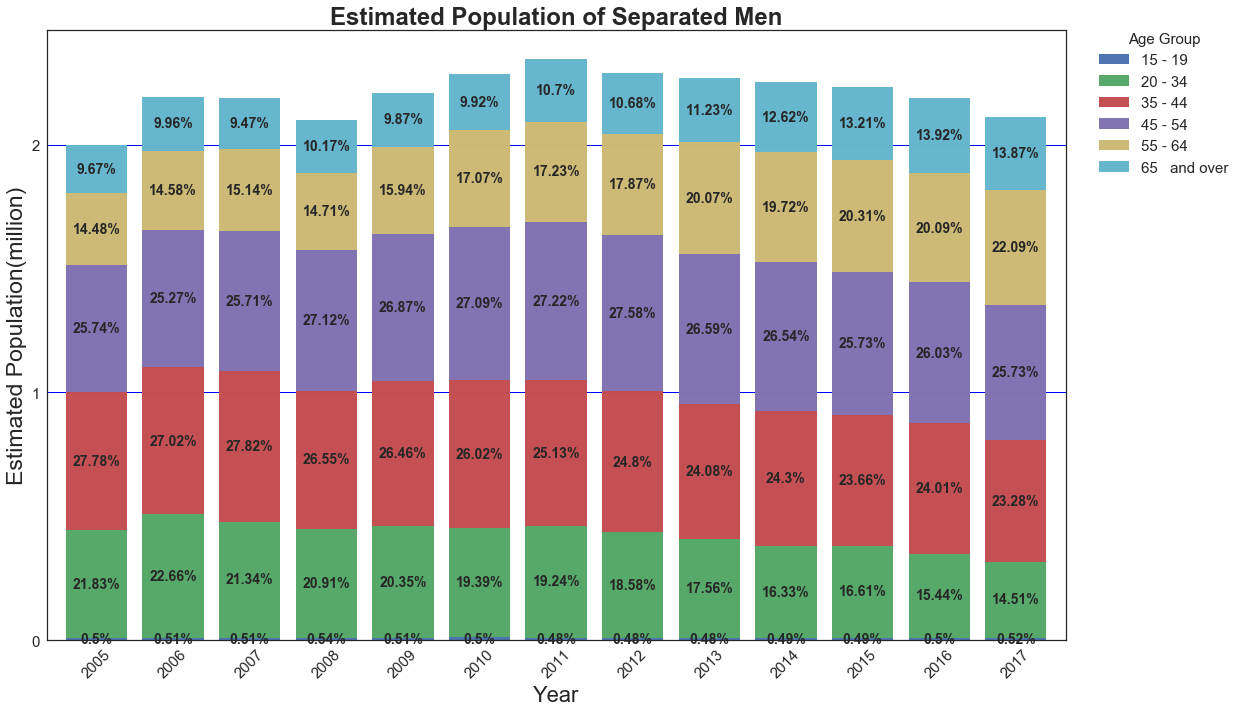

In [730]:
#plotting separated men
plot_status(data=sep_men3,x='separated_men')

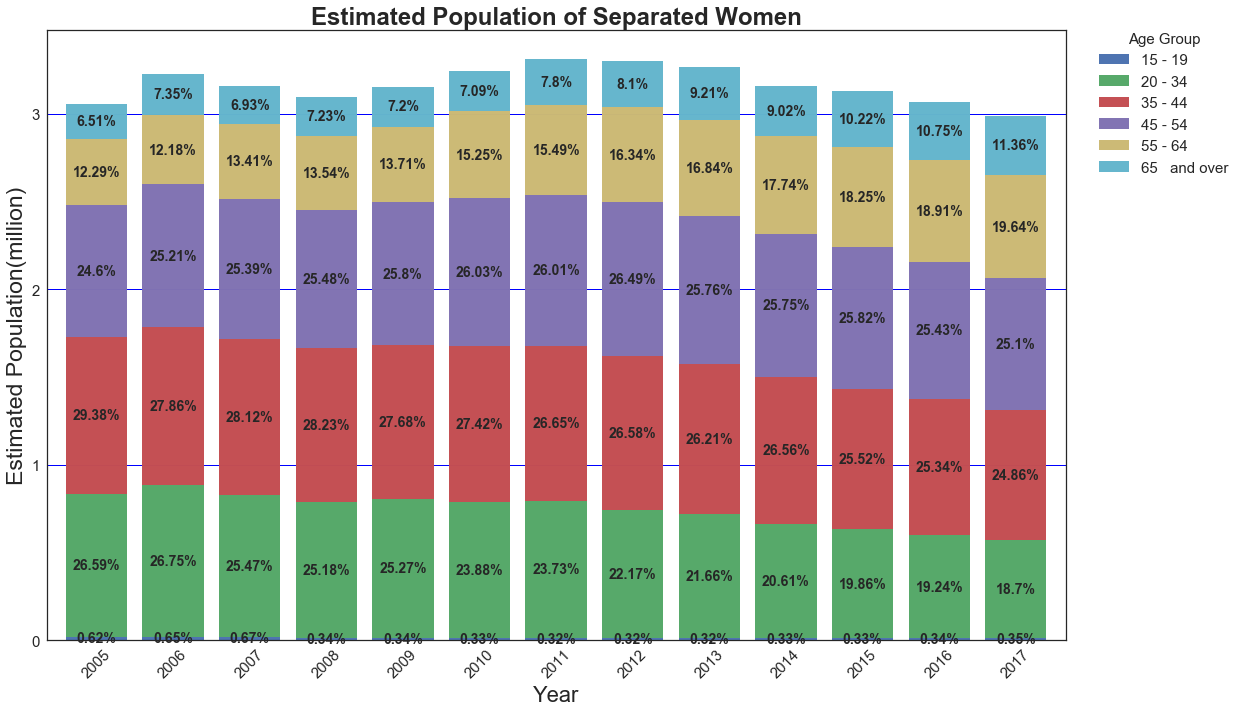

In [729]:
#plotting separated women
plot_status(data=sep_women3,x='separated_women')

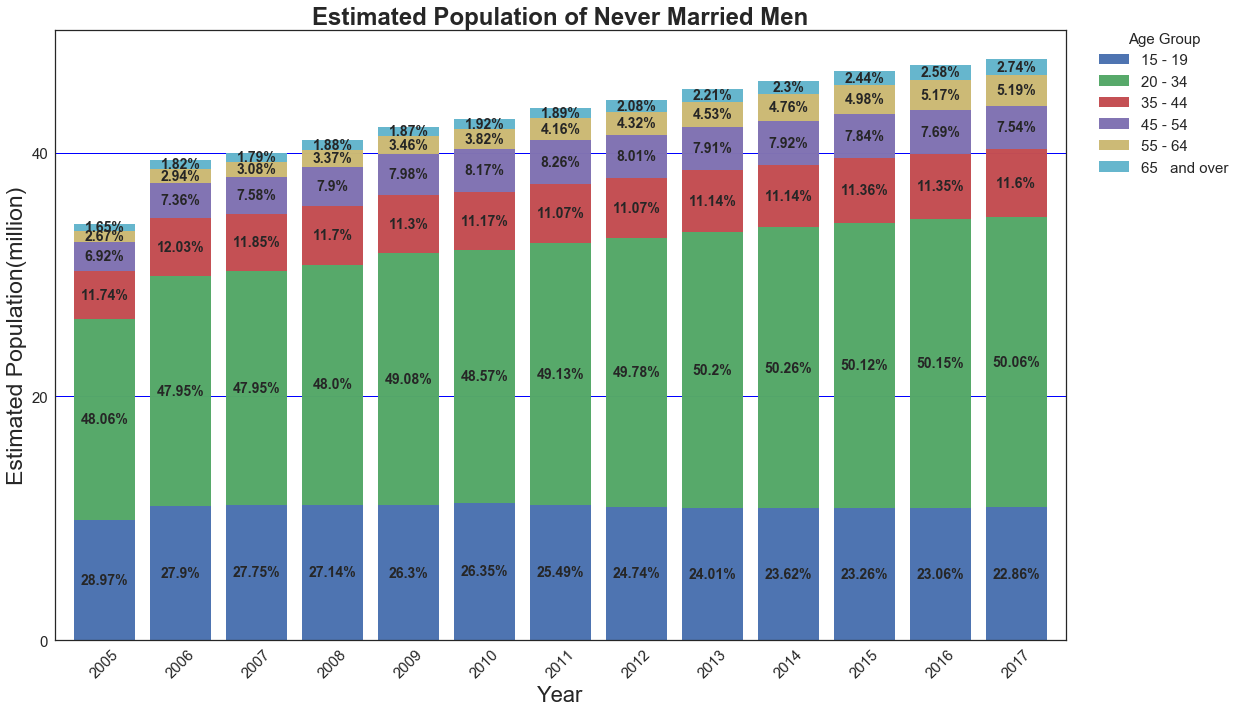

In [728]:
#plotting never married men
plot_status(data=nvr_married_men3,x='nvr_married_men')

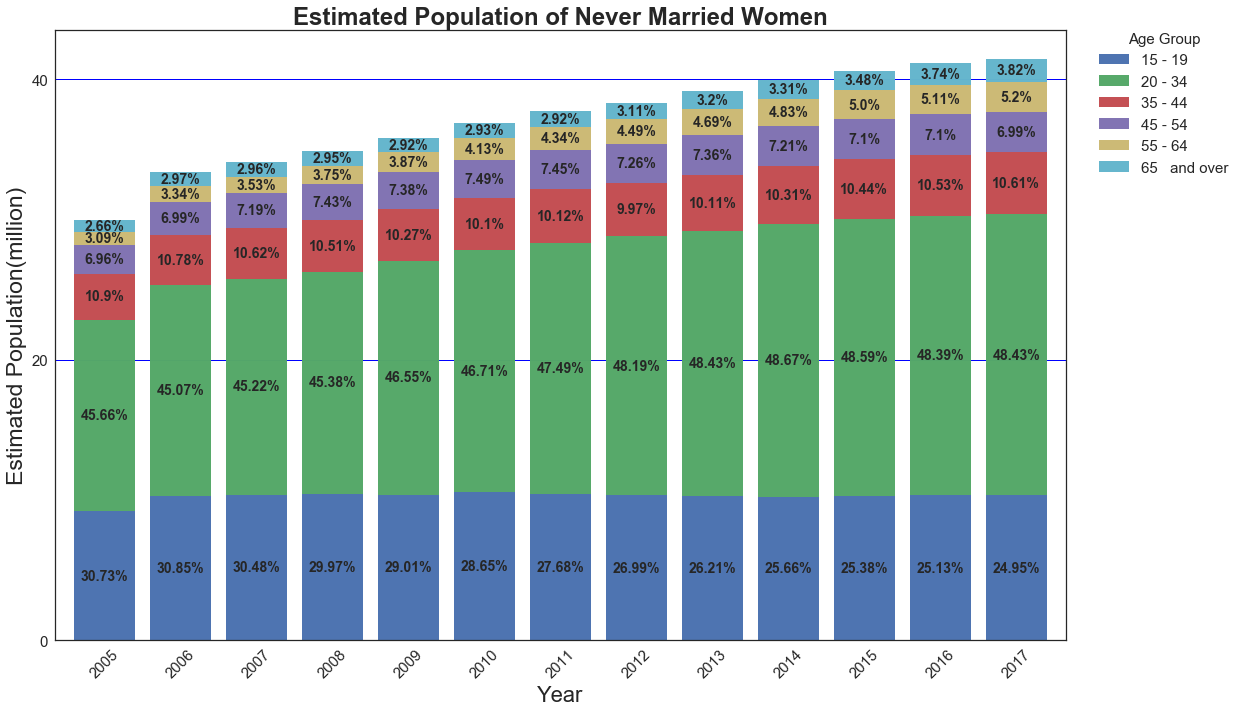

In [727]:
#plotting never married women
plot_status(data=nvr_married_women3,x='nvr_married_women')

In [757]:
title_df

,divorced_men,divorced_women,married_men,married_women,nvr_married_men,nvr_married_women,separated_men,separated_women,widowed_men,widowed_women
0,Estimated Population of Divorced Men,Estimated Population of Divorced Women,Estimated Population of Married Men,Estimated Population of Married Women,Estimated Population of Never Married Men,Estimated Population of Never Married Women,Estimated Population of Separated Men,Estimated Population of Separated Women,Estimated Population of Widowed Men,Estimated Population of Widowed Women
